# Problem Statement 1: 
Build a text classification RNN ( Recurrent Neural Network) model using
IMDB dataset. Import the IMDB dataset using tensorflow_datasets and perform the
following tasks.
Tasks to be performed:
• Import the required libraries
• Shuffle the data for training and create batches of text and label pairs
• Encode the text data
Note: The simplest way to process text for training is using the TextVectorization layer.
• Build a sequential model using tf.keras.Sequential function
• Compile the model
• Train the model using train dataset
• Test the data using tset dataset and evaluate the model by passing a sentence
Note: If the prediction is >= 0.0, it is positive else it is negative.


Example:
# Output:
• Import the required libraries
• Shuffle the data for training and create batches of text and label pairs
• Encode the text data
Note: The simplest way to process text for training is using the TextVectorization layer.
Create the layer, and pass the dataset's text to the layer's .adapt method.
• Build a sequential model using tf.keras.Sequential function
• Compile the model
• Train the model using train dataset
• Test the data using tset dataset and evaluate the model by passing a sentence
Note: If the prediction is >= 0.0, it is positive else it is negative.

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras

In [ ]:
dataset, info = tfds.load("imdb_reviews", with_info = True,
                          as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9TLYJQ/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9TLYJQ/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9TLYJQ/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        '

In [ ]:
train_dataset,test_dataset = dataset['train'],dataset['test']
train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


In [ ]:
buffer_size = 10000
batch_size = 64
train_dataset = train_dataset.shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy())
  print('labels: ', label.numpy())
  print(len(label.numpy()))

texts:  [b'I have walked out of very few movies before they end, but I couldn\'t finish this piece of garbage. This was the biggest load of racism trying to pass as legitimate film since "Birth of a Nation". The characters were little more than cardboard cutouts. I don\'t see how any actor would want their name associated with this film. Lee must have better things to do that put out garbage like this. I know that I and anyone with a brain have better things to do.... like watching paint dry. I wish that someone would make a film about interracial relationships that dealt with the topic realistically. There is a lot more depth to this subject the shallow ranting of a bitter director like Lee.'
 b"Scott Menville is not Casey Kasem. That is the first, most important, and most disturbing thing about this attempt at re-imagining Scooby-Doo and company.<br /><br />Shaggy's voice is squeaky and does not sound anything like he has ever sounded in any of the previous incarnations of the Scooby

In [ ]:
# Create Text Vectorization Layer
vocab_size = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=vocab_size)
encoder.adapt(train_dataset.map(lambda text,label:text))

In [ ]:
import numpy as np
vocab=np.array(encoder.get_vocabulary())
vocab[0:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [ ]:
len(vocab)

1000

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),output_dim=64,mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[0.49912855]]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


391/391 [==============================] - 43s 88ms/step - loss: 0.6323 - accuracy: 0.6335 - val_loss: 0.4585 - val_accuracy: 0.7974
Epoch 2/10
391/391 [==============================] - 31s 80ms/step - loss: 0.3975 - accuracy: 0.8310 - val_loss: 0.3684 - val_accuracy: 0.8458
Epoch 3/10
391/391 [==============================] - 32s 80ms/step - loss: 0.3477 - accuracy: 0.8557 - val_loss: 0.3909 - val_accuracy: 0.8354
Epoch 4/10
391/391 [==============================] - 31s 80ms/step - loss: 0.3238 - accuracy: 0.8664 - val_loss: 0.3275 - val_accuracy: 0.8604
Epoch 5/10
391/391 [==============================] - 32s 81ms/step - loss: 0.3140 - accuracy: 0.8700 - val_loss: 0.3458 - val_accuracy: 0.8536
Epoch 6/10
391/391 [==============================] - 32s 81ms/step - loss: 0.3071 - accuracy: 0.8729 - val_loss: 0.3177 - val_accuracy: 0.8656
Epoch 7/10
391/391 [==============================] - 32s 80ms/step - loss: 0.3057 - accuracy: 0.8725 - val_loss: 0.3160 - val_accuracy: 0.8635
Epo

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 19s 48ms/step - loss: 0.3212 - accuracy: 0.8629
Test Loss: 0.3211973309516907
Test Accuracy: 0.8628799915313721


In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
predictions

array([[0.6382043]], dtype=float32)

# Problem Statement 2:
Sumanth wants to build an flowers image classification CNN model which can take a flower
image as input and prints the name of flower.
Dataset Description: The dataset consist of 3,700 photos of flowers. The dataset contains five
sub-directories, one per class:
• daisy
• dandelion
• roses
• sunflowers
• tulips
Tasks to be performed:
• Import all the required libraries
• Download the flowers data from URL:
'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_phot
os.tgz' using the Keras; and analyzing the images present in the dataset visualization
• Prepare the data by specifying the image resolution and batch size. Also, Splitting the
dataset into training and validation datasets in 80:20 ratio
• Plot a sample image attributed to each class name present in the original dataset.
• Autotune the data using cache().shuffle().prefetch() function; Also, normalize the data by
deviding it with a number
• Build a sequential CNN model
• Compile the model and print model summary
• Train and validate the model and plot the validation results using a line plot
• Feed the system with an image of a flower and print the prediction along with the accuracy.
Example:
Output:
• Import all the required libraries
• Download the flowers data from URL:
'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_phot
os.tgz' using the Keras; and analyzing the images present in the dataset visualization
• Prepare the data by specifying the image resolution and batch size. Also, Splitting the
dataset into training and validation datasets in 80:20 ratio
• Build a sequential CNN model
• Compile the model and print model summary
• Feed the system with an image of a flower and print the prediction along with the accuracy

In [82]:
#Import  libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**objective** 
* Examine and understand data
* Build an input pipeline
* Build the model
* Train the model
* Test the model
* Improve the model and repeat the process

In [83]:
import pathlib
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=data_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [84]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


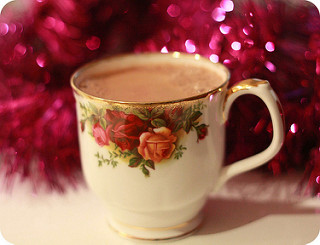

In [85]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[2]))

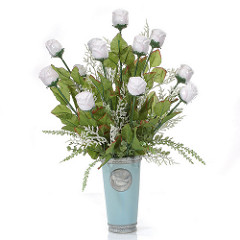

In [86]:
PIL.Image.open(str(roses[50]))

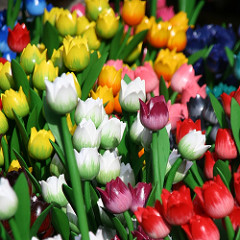

In [87]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

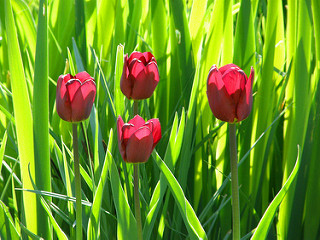

In [88]:
PIL.Image.open(str(tulips[5]))

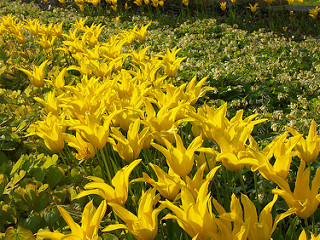

In [89]:
PIL.Image.open(str(tulips[2]))

**Create a dataset**

In [90]:
batch_size = 32
img_height = 180
img_width  = 180


*** Let's use 80% of the images for training, and 20% for validation.*

In [91]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size =(img_height,img_width),
    batch_size = batch_size,
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [92]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size =(img_height,img_width),
    batch_size = batch_size,
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [93]:
class_name = train_ds.class_names
print(class_name)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


**Visualize the data**

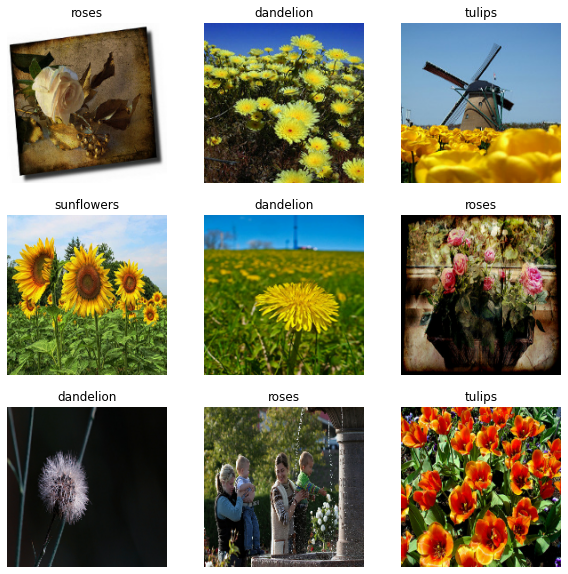

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

In [95]:
for image_batch , label_batch in train_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [96]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [97]:
normalization_layer = layers.Rescaling(1./255)

In [98]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


**Create the model**

In [99]:
num_classes = len(class_name)
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3 ,padding='same' , activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3 ,padding='same' , activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3 ,padding='same' , activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128, 3 ,padding='same' , activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(num_classes),
    
])

In [100]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 64)       

In [101]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [102]:
history = model.fit(train_ds,epochs=10, validation_data=test_ds)

Epoch 1/10
92/92 [==============================] - 4s 37ms/step - loss: 1.2958 - accuracy: 0.4339 - val_loss: 1.0812 - val_accuracy: 0.5559
Epoch 2/10
92/92 [==============================] - 4s 46ms/step - loss: 0.9625 - accuracy: 0.6260 - val_loss: 0.9361 - val_accuracy: 0.6240
Epoch 3/10
92/92 [==============================] - 5s 52ms/step - loss: 0.8359 - accuracy: 0.6751 - val_loss: 0.8507 - val_accuracy: 0.6512
Epoch 4/10
92/92 [==============================] - 5s 53ms/step - loss: 0.6833 - accuracy: 0.7435 - val_loss: 0.8139 - val_accuracy: 0.6730
Epoch 5/10
92/92 [==============================] - 5s 54ms/step - loss: 0.5486 - accuracy: 0.7939 - val_loss: 0.8212 - val_accuracy: 0.7016
Epoch 6/10
92/92 [==============================] - 3s 36ms/step - loss: 0.4033 - accuracy: 0.8495 - val_loss: 0.8926 - val_accuracy: 0.6962
Epoch 7/10
92/92 [==============================] - 3s 35ms/step - loss: 0.2756 - accuracy: 0.9022 - val_loss: 0.9917 - val_accuracy: 0.6771
Epoch 8/10
92

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=10
epoch_range = range(epochs)

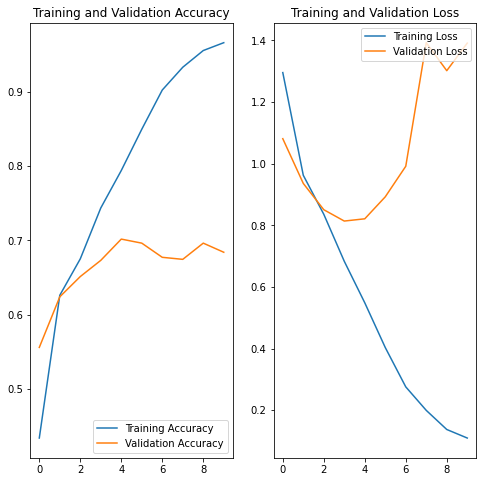

In [104]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label='Training Accuracy')
plt.plot(epoch_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [114]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sunflowers with a 99.98 percent confidence.
